# Exercícios

1. Implementar em `Python` as sequintes funções:

  1. `dct2`, que retorna a DCT em 2D
  
  2. `idct2`, que retorna a inversa
  
2. Carregar "lena.png", e em seguida:

  1. Calcular e mostrar a DCT2D utilizando o item 1. a)
  
  2. Calcular a DCT para cada bloco `8x8` e mostrar
  
  3. Seja `X=dct(img)`; filtrar a imagem por `|X|>t*max(|X|)`, com `t=0.01`

## DCT e IDCT

In [1]:
import matplotlib as mpl
import matplotlib.cm
import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec
import numpy as np

from matplotlib import colorbar
from matplotlib.colors import LogNorm, Normalize, to_rgb

from mpl_toolkits.axes_grid1 import make_axes_locatable

from PIL import Image

from scipy.fftpack import dct, idct

mpl.rcParams['axes.titlesize'] = 10
mpl.rcParams['axes.labelsize'] = 8
mpl.rcParams['xtick.labelsize'] = 8
mpl.rcParams['ytick.labelsize'] = 8

In [2]:
def dct2(block):
    return dct(dct(block.T, norm='ortho').T, norm='ortho')

def idct2(block):
    return idct(idct(block.T, norm='ortho').T, norm='ortho')

## Carregar "Lena.png"

![](Lena.png)

In [3]:
def add_colorbar(ax, pos='right', size=0.1, pad=0.05, 
                 cmap=None, norm=None, off=False, 
                 orientation='vertical', sharex=None):
    divider = make_axes_locatable(ax)
    bar = divider.append_axes(pos, size, pad=pad, sharex=sharex)
    
    if isinstance(cmap, str):
        cmap = matplotlib.cm.cmap_d[cmap]

    if off:
        bar.axis('off')
    else:
        colorbar.ColorbarBase(bar, cmap=cmap, norm=norm, 
                              orientation=orientation)

    return bar

In [4]:
word = 2**8-1
norml8 = Normalize(0, word)

img = np.asarray(Image.open('Lena.png').convert('L'), dtype=float)
print(img/word)

assert img.shape == (512, 512)

[[0.54901961 0.54901961 0.54901961 ... 0.35294118 0.35294118 0.35294118]
 [0.54901961 0.54901961 0.54901961 ... 0.35294118 0.35294118 0.35294118]
 [0.52941176 0.52941176 0.56078431 ... 0.35294118 0.35294118 0.35294118]
 ...
 [0.42745098 0.42745098 0.44313725 ... 0.09411765 0.09411765 0.09411765]
 [0.41568627 0.41568627 0.43137255 ... 0.09019608 0.09019608 0.09019608]
 [0.41568627 0.41568627 0.43137255 ... 0.09019608 0.09019608 0.09019608]]


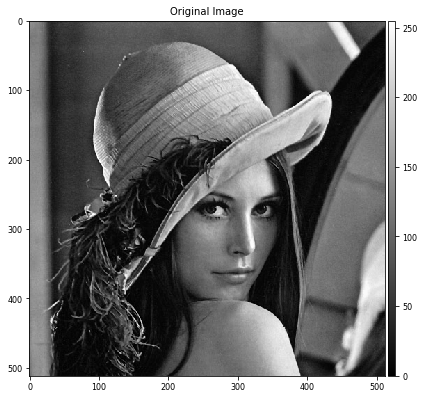

In [5]:
fig, ax = plt.subplots(1, 1, figsize=(6, 6))
fig.set_tight_layout(True)

def drawimg(ax, title, img, cmap, norm):
    ax.set_title(title)
    ax.imshow(img, cmap=cmap, norm=norm)
    add_colorbar(ax, cmap=cmap, norm=norm)
    
drawimg(ax, 'Original Image', img, 'gray', norml8)

In [6]:
normlp = Normalize(0, np.log1p(np.sum(img)))

## DCT2D

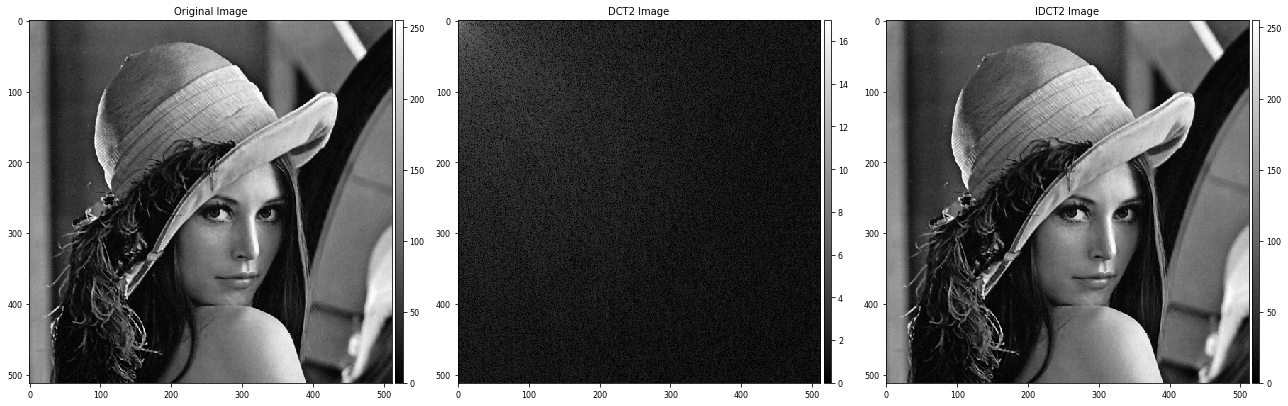

In [7]:
fig, ax = plt.subplots(1, 3, figsize=(18, 6))
fig.set_tight_layout(True)

img_dct  = dct2(img.T)
img_idct = idct2(img_dct.T)
    
drawimg(ax[0], 'Original Image', img, 'gray', norml8)
drawimg(ax[1], 'DCT2 Image', np.log1p(np.abs(img_dct)), 'gray', normlp)
drawimg(ax[2], 'IDCT2 Image', img_idct, 'gray', norml8)

## DCT2D 8x8

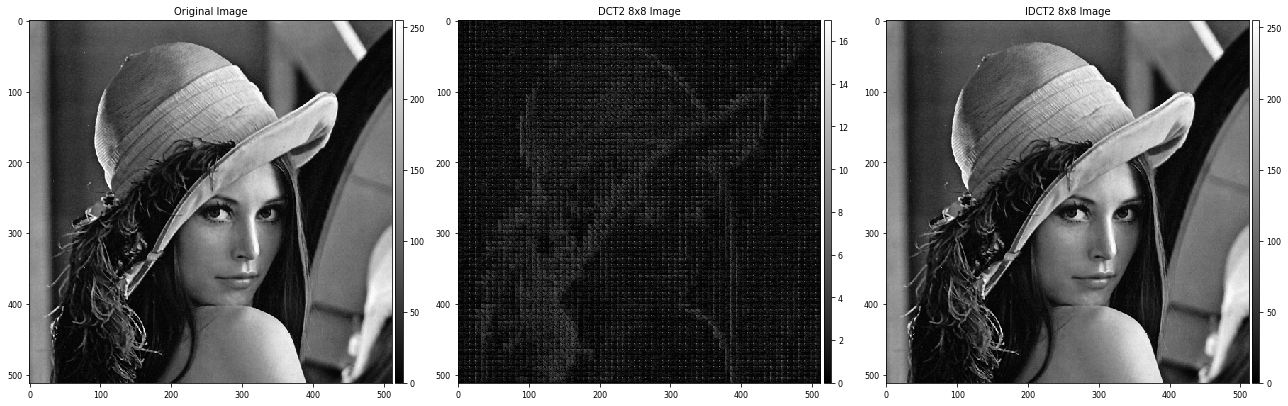

In [8]:
fig, ax = plt.subplots(1, 3, figsize=(18, 6))
fig.set_tight_layout(True)


img_8x8_dct = np.full(img.shape, np.nan)

for i in range(0, img.shape[0], 8):
    for j in range(0, img.shape[1], 8):
        img_8x8_dct[i:i+8, j:j+8] = dct2(img[i:i+8, j:j+8].T)


img_8x8_idct = np.full(img.shape, np.nan)

for i in range(0, img.shape[0], 8):
    for j in range(0, img.shape[1], 8):
        img_8x8_idct[i:i+8, j:j+8] = idct2(img_8x8_dct[i:i+8, j:j+8].T)
        
    
drawimg(ax[0], 'Original Image', img, 'gray', norml8)
drawimg(ax[1], 'DCT2 8x8 Image', np.log1p(np.abs(img_8x8_dct)), 'gray', normlp)
drawimg(ax[2], 'IDCT2 8x8 Image', img_8x8_idct, 'gray', norml8)

## DCT Filtering

In [14]:
from ipywidgets import interactive
from scipy import ndimage

def plot(t=-9, p=3):
    t = 2**t
    p = 2**p
    
    fig, ax = plt.subplots(3, 4, figsize=(18, 12))
    fig.set_tight_layout(True)

    img_dct  = dct2(img.T)
    img_idct = idct2(img_dct.T)

    drawimg(ax[0, 0], 'Original Image', img, 'gray', norml8)
    drawimg(ax[1, 0], 'DCT2 Image', np.log1p(np.abs(img_dct)), 'gray', normlp)
    drawimg(ax[2, 0], 'IDCT2 Image', img_idct, 'gray', norml8)

    
    img_dct_flt = img_dct*(img_dct >= t*np.max(img_dct))
    img_idct_flt = idct2(img_dct_flt.T)
    
    ax[0, 1].axis('off')
    drawimg(ax[1, 1], 'DCT2 Filtered Image', np.log1p(np.abs(img_dct_flt)), 'gray', normlp)
    drawimg(ax[2, 1], 'IDCT2 Filtered Image', img_idct_flt, 'gray', norml8)
    
    
    img_8x8_dct = np.full(img.shape, np.nan)
    for i in range(0, img.shape[0], p):
        for j in range(0, img.shape[1], p):
            img_8x8_dct[i:i+p, j:j+p] = dct2(img[i:i+p, j:j+p].T)

    ax[0, 2].axis('off')
    drawimg(ax[1, 2], 'DCT2 Masked Image', np.log1p(np.abs(img_8x8_dct)), 'gray', normlp)
    drawimg(ax[2, 2], 'IDCT2 Masked Image', img_8x8_idct, 'gray', norml8)

    
    img_8x8_dct_flt = np.array(img_8x8_dct)

    img_8x8_idct_flt = np.full(img.shape, np.nan)
    for i in range(0, img.shape[0], p):
        for j in range(0, img.shape[1], p):
            masked = img_8x8_dct_flt[i:i+p, j:j+p]
            masked = masked*(masked >= t*np.max(masked))
            
            img_8x8_dct_flt[i:i+p, j:j+p]  = masked
            img_8x8_idct_flt[i:i+p, j:j+p] = idct2(masked.T)
    
    ax[0, 3].axis('off')
    drawimg(ax[1, 3], 'DCT2 Filtered Masked Image', np.log1p(np.abs(img_8x8_dct_flt)), 'gray', normlp)
    drawimg(ax[2, 3], 'IDCT2 Filtered Masked Image', img_8x8_idct_flt, 'gray', norml8)

interactive(plot, t=(-15, 0, 1), p=(1, 9, 1))

interactive(children=(IntSlider(value=-9, description='t', max=0, min=-15), IntSlider(value=3, description='p'…